In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing # scikit learn

# Datasets

In [ ]:


country = pd.read_json('country.json') 
country = country.sort_index()
country

,Data Source,abk,link,un3,un4
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0
1,Switzerland,CHE,1.077222,8.372098e+06,39516.0
2,Germany,DEU,1.193867,8.266768e+07,348900.0
3,Denmark,DNK,0.834638,NaN,42262.0
4,Spain,ESP,-0.008048,4.644396e+07,500210.0
5,France,FRA,0.407491,6.689611e+07,547557.0
6,Japan,JPN,-0.115284,1.269945e+08,364560.0
7,Greece,GRC,-0.687543,1.074674e+07,128900.0
8,Iran,IRN,1.148789,8.027743e+07,1628760.0
9,Kuwait,KWT,2.924206,4.052584e+06,NaN


In [ ]:
country = country.rename(columns={'Data Source':'Name', 'abk':'Code',
                        'link':'pop_growth', 'un3':'pop', 'un4':'Area'})
country

,Name,Code,pop_growth,pop,Area
0,Brazil,BRA,0.817556,2.076529e+08,8358140.0
1,Switzerland,CHE,1.077222,8.372098e+06,39516.0
2,Germany,DEU,1.193867,8.266768e+07,348900.0
3,Denmark,DNK,0.834638,NaN,42262.0
4,Spain,ESP,-0.008048,4.644396e+07,500210.0
5,France,FRA,0.407491,6.689611e+07,547557.0
6,Japan,JPN,-0.115284,1.269945e+08,364560.0
7,Greece,GRC,-0.687543,1.074674e+07,128900.0
8,Iran,IRN,1.148789,8.027743e+07,1628760.0
9,Kuwait,KWT,2.924206,4.052584e+06,NaN


In [ ]:
country.shape

(16, 5)

In [ ]:
country.drop('Code', axis=1, inplace=True) 
country

,Name,pop_growth,pop,Area
0,Brazil,0.817556,2.076529e+08,8358140.0
1,Switzerland,1.077222,8.372098e+06,39516.0
2,Germany,1.193867,8.266768e+07,348900.0
3,Denmark,0.834638,NaN,42262.0
4,Spain,-0.008048,4.644396e+07,500210.0
5,France,0.407491,6.689611e+07,547557.0
6,Japan,-0.115284,1.269945e+08,364560.0
7,Greece,-0.687543,1.074674e+07,128900.0
8,Iran,1.148789,8.027743e+07,1628760.0
9,Kuwait,2.924206,4.052584e+06,NaN


In [ ]:
country.rename(index=country.Name, inplace=True) # new index
country

,Name,pop_growth,pop,Area
Brazil,Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,Switzerland,1.077222,8.372098e+06,39516.0
Germany,Germany,1.193867,8.266768e+07,348900.0
Denmark,Denmark,0.834638,NaN,42262.0
Spain,Spain,-0.008048,4.644396e+07,500210.0
France,France,0.407491,6.689611e+07,547557.0
Japan,Japan,-0.115284,1.269945e+08,364560.0
Greece,Greece,-0.687543,1.074674e+07,128900.0
Iran,Iran,1.148789,8.027743e+07,1628760.0
Kuwait,Kuwait,2.924206,4.052584e+06,NaN


In [ ]:
country.drop('Name', axis=1, inplace=True)
country
"""
    Die Vorlage vom Datensatz ist zu beachten:
    
    Sample steht auf den Zeilen,
    Eigenschaft steht auf den Stpalten
"""

'\n    Die Vorlage vom Datensatz ist zu beachten:\n    \n    Sample steht auf den Zeilen,\n    Eigenschaft steht auf den Stpalten\n'

In [ ]:
"""
    Wie zu sehen ist, gibt es z.B. für Area nur 15 non-null Elemente, also 
    ein Element ist dann null.
"""
country.info() # Informationen über das Objekt

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Brazil to World
Data columns (total 3 columns):
pop_growth    14 non-null float64
pop           15 non-null float64
Area          15 non-null float64
dtypes: float64(3)
memory usage: 512.0+ bytes


In [ ]:
country.describe() # Das gibt ein paar statistische Informationen
# Viele Informationen kann man von dieser Tabelle bekommen, z.B. hier
# ist einfach zu sehen, dass ein Eintrag zumindest falsch ist, weil 
# Maximum von pop hier, 7 Milliarden ist, dann das ist natürlich falsch.

# Das kann nützlich sein für numerische Daten

,pop_growth,pop,Area
count,14.000000,1.500000e+01,1.500000e+01
mean,1.145492,6.422767e+08,9.762744e+06
std,1.173196,1.909868e+09,3.325701e+07
min,-0.687543,2.569804e+06,1.161000e+04
25%,0.510007,1.032493e+07,2.389000e+05
50%,1.112718,6.689611e+07,4.463000e+05
75%,1.190820,1.564920e+08,1.269765e+06
max,3.495070,7.442136e+09,1.297332e+08


In [ ]:
max_pop = country['pop'].max()
max_pop

7442136000.0

In [ ]:
country['pop'] # Ganze Spalte

Brazil         2.076529e+08
Switzerland    8.372098e+06
Germany        8.266768e+07
Denmark                 NaN
Spain          4.644396e+07
France         6.689611e+07
Japan          1.269945e+08
Greece         1.074674e+07
Iran           8.027743e+07
Kuwait         4.052584e+06
Morocco        3.527679e+07
Nigeria        1.859896e+08
Qatar          2.569804e+06
Sweden         9.903122e+06
India          1.324171e+09
World          7.442136e+09
Name: pop, dtype: float64

In [ ]:
country[country['pop']==max_pop] # das selektiert das Element, das 
# sein Wert glich max_pop ist.


,pop_growth,pop,Area
World,1.18168,7.442136e+09,129733172.7


In [ ]:
country['pop'][country['pop']==max_pop] # in der Spalte pop

World    7.442136e+09
Name: pop, dtype: float64

In [ ]:
country.drop('World', axis=0, inplace=True)
country

,pop_growth,pop,Area
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077222,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,NaN,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0
Kuwait,2.924206,4.052584e+06,NaN


# Missing Value

In [ ]:
# NaN: not a number oder null, ..., ungültige oder felende Daten
# np.nan
country.isnull() # Finden die null-Daten

,pop_growth,pop,Area
Brazil,False,False,False
Switzerland,False,False,False
Germany,False,False,False
Denmark,False,True,False
Spain,False,False,False
France,False,False,False
Japan,False,False,False
Greece,False,False,False
Iran,False,False,False
Kuwait,False,False,True


In [ ]:
#country.replace(0, np.nan, inplace=True)
# mit der Funktion replace kann man die Eniträge wechseln.
country

,pop_growth,pop,Area
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077222,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,NaN,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0
Kuwait,2.924206,4.052584e+06,NaN


In [ ]:
country.isnull().sum()

pop_growth    2
pop           1
Area          1
dtype: int64

In [ ]:
"""
    Wir können verschiedene Strategien für NaN-Einträge nehmen:
    
    - ganze Sample (die Zeile) verzichten.
    mit: <DataFrame>.dropna(axis=0), axis=0 löscht die Zeile, axis=1 löscht
    die Spalte, die  NaN-Wert hat.
    * Aber das ist keine gute Strategie, besonders wenn, wir keine viele 
    Daten haben.
    
    
"""
country.dropna(axis=0)

,pop_growth,pop,Area
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077222,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0
Nigeria,2.619034,1.859896e+08,910770.0
Qatar,3.495070,2.569804e+06,11610.0


In [ ]:
"""
    2. Strategie: Filling NaN, füllen NaN
"""
country.fillna(0) # Das füllt die Zellen, NaN-Wert enthalten, mit 0.

,pop_growth,pop,Area
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077222,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,0.000000e+00,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0
Kuwait,2.924206,4.052584e+06,0.0


In [ ]:
country.replace(np.NaN, 0) # Man kann gleiche mit replace machen.

,pop_growth,pop,Area
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077222,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,0.000000e+00,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0
Kuwait,2.924206,4.052584e+06,0.0


In [ ]:
country.fillna({'pop_growth':0, 'pop': 1000000, 'Area':5000})
# So kann man bestimmtes Verhalten, für bestimmter Fall, haben.
# z.B. wenn pop fehlt, setz den Wert 1000000 dafür, usw. 
# - Das kann z.B. Mittelwert von anderen sein. -

,pop_growth,pop,Area
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077222,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,1.000000e+06,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0
Kuwait,2.924206,4.052584e+06,5000.0


In [ ]:
"""
    3. Strategie:
    füllen Zelle mit dem Wert von vorherigen Zeile - forwardfill -
"""


country.fillna(method='ffill')

,pop_growth,pop,Area
Brazil,0.817556,2.076529e+08,8358140.0
Switzerland,1.077222,8.372098e+06,39516.0
Germany,1.193867,8.266768e+07,348900.0
Denmark,0.834638,8.266768e+07,42262.0
Spain,-0.008048,4.644396e+07,500210.0
France,0.407491,6.689611e+07,547557.0
Japan,-0.115284,1.269945e+08,364560.0
Greece,-0.687543,1.074674e+07,128900.0
Iran,1.148789,8.027743e+07,1628760.0
Kuwait,2.924206,4.052584e+06,1628760.0


In [ ]:
"""
    andare Strategie mithilfe vom Package SciKit Learn
"""

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0) # imp ist ein Objekt
# Strategie: Mittelwert, imputation: Zuweisung
imp.fit(country)    # Improt der Daten im Objekt
new_dataset = imp.transform(country) # Umwandlung der Eintrage mit oben bestimmten Regeln
new_dataset

array([[ 8.17556000e-01,  2.07652900e+08,  8.35814000e+06],
       [ 1.07722200e+00,  8.37209800e+06,  3.95160000e+04],
       [ 1.19386700e+00,  8.26676800e+07,  3.48900000e+05],
       [ 8.34638000e-01,  1.56572451e+08,  4.22620000e+04],
       [-8.04800000e-03,  4.64439600e+07,  5.00210000e+05],
       [ 4.07491000e-01,  6.68961100e+07,  5.47557000e+05],
       [-1.15284000e-01,  1.26994500e+08,  3.64560000e+05],
       [-6.87543000e-01,  1.07467400e+07,  1.28900000e+05],
       [ 1.14878900e+00,  8.02774300e+07,  1.62876000e+06],
       [ 2.92420600e+00,  4.05258400e+06,  1.19342750e+06],
       [ 1.14270869e+00,  3.52767900e+07,  4.46300000e+05],
       [ 2.61903400e+00,  1.85989600e+08,  9.10770000e+05],
       [ 3.49507000e+00,  2.56980400e+06,  1.16100000e+04],
       [ 1.14270869e+00,  9.90312200e+06,  4.07310000e+05],
       [ 1.14821500e+00,  1.32417100e+09,  2.97319000e+06]])

In [ ]:
"""
    Wie oben zu sehen ist, wurde die fehlende Einträge durch den Mittelwert ausgefüllt.
"""
country.mean()

pop_growth    1.142709e+00
pop           1.565725e+08
Area          1.193428e+06
dtype: float64

# Duplikaten

In [ ]:
my_data = pd.DataFrame([[1, 'a', 'A'] ,[2, 'a','A'] ,[2, 'a','A']
                        ,[3, 'b','B']  ,[4, 'b','B']  ,[4, 'b','B']], 
                      columns = ['Col1', 'Col2', 'Col3'])
my_data

,Col1,Col2,Col3
0,1,a,A
1,2,a,A
2,2,a,A
3,3,b,B
4,4,b,B
5,4,b,B


In [ ]:
"""
    um duplizierte Einträge zu finden:
"""
my_data.duplicated()

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
"""
    um duplizierte Einträge zu entfernen:
    die Zeilen, die ganz gleich sind.
    
    *** erste bleibt!
"""
my_data.drop_duplicates()

,Col1,Col2,Col3
0,1,a,A
1,2,a,A
3,3,b,B
4,4,b,B


In [ ]:
"""
    um nach einer bestimmten Spalte zu suchen und löschen:
    
    *** erste bleibt!
"""
my_data.drop_duplicates('Col2')

,Col1,Col2,Col3
0,1,a,A
3,3,b,B


# Concatenating: verbinden oder verketten

In [ ]:
# Die sind z.B. ein paar Noten in ein
my_source1 = pd.DataFrame([['babak', 1, 13, 17, 17], 
                          ['raha', 2, 14, 14, 15], 
                          ['sara', 3, 17, 12, 20], 
                          ['reza', 4, 12, 18, 19]],
                         )
my_source1

,0,1,2,3,4
0,babak,1,13,17,17
1,raha,2,14,14,15
2,sara,3,17,12,20
3,reza,4,12,18,19


In [ ]:
my_source2 = pd.DataFrame([['babak', 1, 13, 17], 
                          ['baran', 2, 15, 20],
                          ['sara', 3, 14, 19],
                          ['arash', 4, 20, 19],
                          ['mahan', 5, 15, 18],
                          ['reza', 6, 14, 12],])
my_source2

,0,1,2,3
0,babak,1,13,17
1,baran,2,15,20
2,sara,3,14,19
3,arash,4,20,19
4,mahan,5,15,18
5,reza,6,14,12


In [ ]:
"""
    DataFrames werden erweitertet, in der Höhe und Länge.
    fehlende Daten werden mit NaN ausfegüllt.
"""
my_concat = pd.concat([my_source1, my_source2], axis=0, ignore_index=True)
# ba shift + tab: tozihate kaml tar dar morede argoman ha
# ignore_index: das gibt neue Indisen
# axis=0, Zeilen
my_concat

,0,1,2,3,4
0,babak,1,13,17,17.0
1,raha,2,14,14,15.0
2,sara,3,17,12,20.0
3,reza,4,12,18,19.0
4,babak,1,13,17,NaN
5,baran,2,15,20,NaN
6,sara,3,14,19,NaN
7,arash,4,20,19,NaN
8,mahan,5,15,18,NaN
9,reza,6,14,12,NaN


In [ ]:
"""
    Manche haben Note in 4. Spalte, aber andere haben keine, deswegen
    löschen wir lieber sie.
"""
my_concat.drop([4], axis=1, inplace=True)
my_concat

,0,1,2,3
0,babak,1,13,17
1,raha,2,14,14
2,sara,3,17,12
3,reza,4,12,18
4,babak,1,13,17
5,baran,2,15,20
6,sara,3,14,19
7,arash,4,20,19
8,mahan,5,15,18
9,reza,6,14,12


In [ ]:
"""
    Wir entfernen die Duplikaten
"""
my_concat.drop_duplicates(inplace=True)
my_concat

,0,1,2,3
0,babak,1,13,17
1,raha,2,14,14
2,sara,3,17,12
3,reza,4,12,18
5,baran,2,15,20
6,sara,3,14,19
7,arash,4,20,19
8,mahan,5,15,18
9,reza,6,14,12


In [ ]:
"""
    Aber die Indisen brauchen, erneut bestimmt zu werden.
"""
my_concat.reset_index(drop=True, inplace=True)
my_concat

,0,1,2,3
0,babak,1,13,17
1,raha,2,14,14
2,sara,3,17,12
3,reza,4,12,18
4,baran,2,15,20
5,sara,3,14,19
6,arash,4,20,19
7,mahan,5,15,18
8,reza,6,14,12


In [ ]:
smartphones = pd.read_json('smartphones.json')
smartphones

,Capacity,Company,Name,OS,Ram,Weight,inch
0,64,Samsung,Galaxy S8,Android,4,149,5.8
1,32,Microsoft,Lumia 950,windows,3,150,5.2
2,16,Sony,Xperia L1,Android,2,180,5.5
3,128,Apple,Iphone 7,ios,2,138,4.7
4,64,HTC,U Ultra,Android,4,170,5.7
5,16,Samsung,Galaxy S5,Android,2,145,5.1
6,32,Apple,Iphone 5s,ios,1,112,4.0
7,16,Motorola,Moto G5,Android,3,144,5.0
8,128,Google,Pixel,Android,4,143,5.0


In [ ]:
"""
    Das zeigt nur statische Informationen über numerische Daten
"""
smartphones.describe() 

,Capacity,Ram,Weight,inch
count,9.000000,9.000000,9.000000,9.000000
mean,55.111111,2.777778,147.888889,5.111111
std,45.333333,1.092906,19.231773,0.548736
min,16.000000,1.000000,112.000000,4.000000
25%,16.000000,2.000000,143.000000,5.000000
50%,32.000000,3.000000,145.000000,5.100000
75%,64.000000,4.000000,150.000000,5.500000
max,128.000000,4.000000,180.000000,5.800000


In [ ]:
smartphones.OS.value_counts() # Kategoriale Daten

Android    6
ios        2
windows    1
Name: OS, dtype: int64

In [ ]:
smartphones.Company.value_counts()

Samsung      2
Apple        2
Microsoft    1
HTC          1
Motorola     1
Google       1
Sony         1
Name: Company, dtype: int64

In [ ]:
smartphones.Capacity.value_counts()

16     3
32     2
128    2
64     2
Name: Capacity, dtype: int64

# Group and aggregate

In [ ]:
"""
    Je nach OS
"""
cat_os = smartphones.groupby(smartphones['OS'])# Kategorieren der Datan nach OS
cat_os.mean()

,Capacity,Ram,Weight,inch
OS,,,,
Android,50.666667,3.166667,155.166667,5.35
ios,80.000000,1.500000,125.000000,4.35
windows,32.000000,3.000000,150.000000,5.20


In [ ]:
"""
    Je nach Company
"""
cat_company = smartphones.groupby('Company')
cat_company.mean()

,Capacity,Ram,Weight,inch
Company,,,,
Apple,80.0,1.5,125.0,4.35
Google,128.0,4.0,143.0,5.00
HTC,64.0,4.0,170.0,5.70
Microsoft,32.0,3.0,150.0,5.20
Motorola,16.0,3.0,144.0,5.00
Samsung,40.0,3.0,147.0,5.45
Sony,16.0,2.0,180.0,5.50


# Crosstab

In [ ]:
"""
    Crosstab or cross tabulatio is used to aggregate and jointly display the
    distribution of two or more variables by tabulating their result one againt
    the other in 2-dimensional grids.
    
    jadvale tajmi e zarbdari
"""
pd.crosstab(smartphones.OS, smartphones.Capacity)

Capacity,16,32,64,128
OS,,,,
Android,3,0,2,1
ios,0,1,0,1
windows,0,1,0,0


# Pivot Table

In [ ]:
"""
    Das ist gut, zu vergleichen zwischen den Daten, die verschiedene 
    Möglichkeiten haben.
    Aber hier z.B. weil Galaxy s5 gehört zu Samsung und nicht anadere 
    nur gibt es daher fü Samsung ein Wert, und andere haben keine wert.
    
"""
pd.pivot_table(smartphones, index='Name', columns = 'Company', values='Ram')

Company,Apple,Google,HTC,Microsoft,Motorola,Samsung,Sony
Name,,,,,,,
Galaxy S5,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Galaxy S8,NaN,NaN,NaN,NaN,NaN,4.0,NaN
Iphone 5s,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Iphone 7,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Lumia 950,NaN,NaN,NaN,3.0,NaN,NaN,NaN
Moto G5,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Pixel,NaN,4.0,NaN,NaN,NaN,NaN,NaN
U Ultra,NaN,NaN,4.0,NaN,NaN,NaN,NaN
Xperia L1,NaN,NaN,NaN,NaN,NaN,NaN,2.0


# Dumy Variable

In [ ]:
"""
    Für meschinelles Lernen und benutzen SciKit Learn braucht man die 
    nummerische Daten, dewhalb muss man zuerst die Daten von kategorisch in
    nummerisch umwandeln, und dann eine Modelle bauen.
"""
# Name ist eigentlich keine Eigenschaft, dann kann als Index betrachtet werden.
smartphones.rename(index=smartphones.Name, inplace=True)
smartphones

,Capacity,Company,Name,OS,Ram,Weight,inch
Galaxy S8,64,Samsung,Galaxy S8,Android,4,149,5.8
Lumia 950,32,Microsoft,Lumia 950,windows,3,150,5.2
Xperia L1,16,Sony,Xperia L1,Android,2,180,5.5
Iphone 7,128,Apple,Iphone 7,ios,2,138,4.7
U Ultra,64,HTC,U Ultra,Android,4,170,5.7
Galaxy S5,16,Samsung,Galaxy S5,Android,2,145,5.1
Iphone 5s,32,Apple,Iphone 5s,ios,1,112,4.0
Moto G5,16,Motorola,Moto G5,Android,3,144,5.0
Pixel,128,Google,Pixel,Android,4,143,5.0


In [ ]:
smartphones.drop(['Name', 'Company'], axis=1, inplace=True)
smartphones

,Capacity,OS,Ram,Weight,inch
Galaxy S8,64,Android,4,149,5.8
Lumia 950,32,windows,3,150,5.2
Xperia L1,16,Android,2,180,5.5
Iphone 7,128,ios,2,138,4.7
U Ultra,64,Android,4,170,5.7
Galaxy S5,16,Android,2,145,5.1
Iphone 5s,32,ios,1,112,4.0
Moto G5,16,Android,3,144,5.0
Pixel,128,Android,4,143,5.0


In [ ]:
"""
    mit dummies kann man die kategoriale Daten in numerische Daten umwandeln 
    z.B: hier man eine Spalte auch reduzieren, z.B. OS_windows
"""
smartphones_data = pd.get_dummies(smartphones)
smartphones_data.drop('OS_windows', axis=True, inplace=True)
smartphones_data

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,64,4,149,5.8,1,0
Lumia 950,32,3,150,5.2,0,0
Xperia L1,16,2,180,5.5,1,0
Iphone 7,128,2,138,4.7,0,1
U Ultra,64,4,170,5.7,1,0
Galaxy S5,16,2,145,5.1,1,0
Iphone 5s,32,1,112,4.0,0,1
Moto G5,16,3,144,5.0,1,0
Pixel,128,4,143,5.0,1,0


In [ ]:
smartphones_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Galaxy S8 to Pixel
Data columns (total 7 columns):
Capacity      9 non-null int64
Ram           9 non-null int64
Weight        9 non-null int64
inch          9 non-null float64
OS_Android    9 non-null uint8
OS_ios        9 non-null uint8
OS_windows    9 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 387.0+ bytes


# Normalize Data

In [ ]:
"""
    Normalisierung der Datan: 
    
    Beim Bauen einer Modelle haben die Daten - Eigenschaften -  mit größeren 
    Betrag unerwünschten stärkeren Einfluss auf der Modelle. Die Auswirkung 
    können wir normalisieren.
"""
smartphones_data

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,64,4,149,5.8,1,0
Lumia 950,32,3,150,5.2,0,0
Xperia L1,16,2,180,5.5,1,0
Iphone 7,128,2,138,4.7,0,1
U Ultra,64,4,170,5.7,1,0
Galaxy S5,16,2,145,5.1,1,0
Iphone 5s,32,1,112,4.0,0,1
Moto G5,16,3,144,5.0,1,0
Pixel,128,4,143,5.0,1,0


In [ ]:
smartphones_data.describe() # Die Eigenschaften haben verschiedene Bereiche

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,55.111111,2.777778,147.888889,5.111111,0.666667,0.222222
std,45.333333,1.092906,19.231773,0.548736,0.500000,0.440959
min,16.000000,1.000000,112.000000,4.000000,0.000000,0.000000
25%,16.000000,2.000000,143.000000,5.000000,0.000000,0.000000
50%,32.000000,3.000000,145.000000,5.100000,1.000000,0.000000
75%,64.000000,4.000000,150.000000,5.500000,1.000000,0.000000
max,128.000000,4.000000,180.000000,5.800000,1.000000,1.000000


In [ ]:
smartphones_data

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,64,4,149,5.8,1,0
Lumia 950,32,3,150,5.2,0,0
Xperia L1,16,2,180,5.5,1,0
Iphone 7,128,2,138,4.7,0,1
U Ultra,64,4,170,5.7,1,0
Galaxy S5,16,2,145,5.1,1,0
Iphone 5s,32,1,112,4.0,0,1
Moto G5,16,3,144,5.0,1,0
Pixel,128,4,143,5.0,1,0


'\n    hamintor ke dide mishavad, dade ha range ha\n'

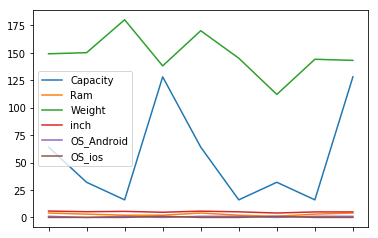

In [ ]:
"""
    Um Daten zu normalisieren, gibt es verschiedene Methoden:
    
    1. standardization: azash meghdare miangino kam mikone, va taghsim bar std
    ya hamoon enheraf meyar mikone, hame dade ha howle 0 mishavand, variance e
    yek peyda mikonand.
    
    2. normalize: scale mikone yek feature ra va norme vahed barash be vojood 
    miare, yani ma agar morabae har nemoone ra jam konim meghdarash yek mishe
    har satr ra be meghdare normesh taghsim mikone:
    do raveshe maroof l1: raveshe manhatan , l2: raveshe oghlidoosi hastesh, ke
    raveshe hesab kardane norm hastesh.
    
    3. min max scale: mitavan dade ha ra be range e delkhah enteghal dad.
"""
from sklearn.preprocessing import scale, normalize, minmax_scale


smartphones_data.plot()


# standardization

In [ ]:

scale_data = scale(smartphones_data)
scale_data

array([[ 0.20797258,  1.18616051,  0.06127939,  1.33156402,  0.70710678,
        -0.53452248],
       [-0.54072872,  0.21566555,  0.11643084,  0.17181471, -1.41421356,
        -0.53452248],
       [-0.91507936, -0.75482941,  1.7709743 ,  0.75168936,  0.70710678,
        -0.53452248],
       [ 1.70537518, -0.75482941, -0.54538655, -0.79464304, -1.41421356,
         1.87082869],
       [ 0.20797258,  1.18616051,  1.21945981,  1.13827247,  0.70710678,
        -0.53452248],
       [-0.91507936, -0.75482941, -0.15932641, -0.02147684,  0.70710678,
        -0.53452248],
       [-0.54072872, -1.72532437, -1.97932422, -2.1476839 , -1.41421356,
         1.87082869],
       [-0.91507936,  0.21566555, -0.21447786, -0.21476839,  0.70710678,
        -0.53452248],
       [ 1.70537518,  1.18616051, -0.26962931, -0.21476839,  0.70710678,
        -0.53452248]])

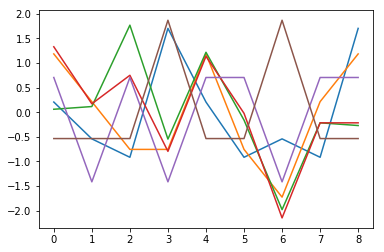

In [ ]:
import matplotlib.pyplot as plt

plt.plot(scale_data)
plt.show()

In [ ]:
df_data = pd.DataFrame(scale_data, index=smartphones.index,
                       columns = smartphones_data.columns)
df_data

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,0.207973,1.186161,0.061279,1.331564,0.707107,-0.534522
Lumia 950,-0.540729,0.215666,0.116431,0.171815,-1.414214,-0.534522
Xperia L1,-0.915079,-0.754829,1.770974,0.751689,0.707107,-0.534522
Iphone 7,1.705375,-0.754829,-0.545387,-0.794643,-1.414214,1.870829
U Ultra,0.207973,1.186161,1.219460,1.138272,0.707107,-0.534522
Galaxy S5,-0.915079,-0.754829,-0.159326,-0.021477,0.707107,-0.534522
Iphone 5s,-0.540729,-1.725324,-1.979324,-2.147684,-1.414214,1.870829
Moto G5,-0.915079,0.215666,-0.214478,-0.214768,0.707107,-0.534522
Pixel,1.705375,1.186161,-0.269629,-0.214768,0.707107,-0.534522


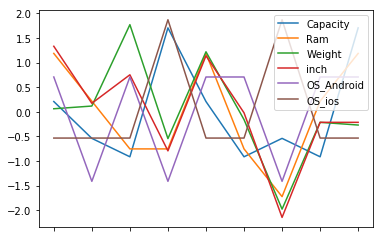

In [ ]:
df_data.plot()
plt.show()

# normalize

In [ ]:
normalized_data_l2 = normalize(smartphones_data, norm='l2', axis=0)
normalized_data_l2

array([[0.30588765, 0.45003516, 0.33334167, 0.37633785, 0.40824829,
        0.        ],
       [0.15294382, 0.33752637, 0.33557887, 0.33740635, 0.        ,
        0.        ],
       [0.07647191, 0.22501758, 0.40269464, 0.3568721 , 0.40824829,
        0.        ],
       [0.61177529, 0.22501758, 0.30873256, 0.30496343, 0.        ,
        0.70710678],
       [0.30588765, 0.45003516, 0.38032272, 0.36984927, 0.40824829,
        0.        ],
       [0.07647191, 0.22501758, 0.32439291, 0.33091777, 0.40824829,
        0.        ],
       [0.15294382, 0.11250879, 0.25056555, 0.25954335, 0.        ,
        0.70710678],
       [0.07647191, 0.33752637, 0.32215571, 0.32442918, 0.40824829,
        0.        ],
       [0.61177529, 0.45003516, 0.31991852, 0.32442918, 0.40824829,
        0.        ]])

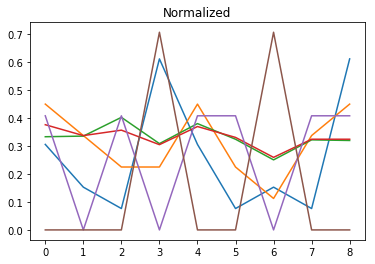

In [ ]:
plt.plot(normalized_data_l2)
plt.title('Normalized')
plt.show()

In [ ]:
normalized_data_l1 = normalize(smartphones_data, norm='l1', axis=0)
normalized_data_l1

array([[0.12903226, 0.16      , 0.11194591, 0.12608696, 0.16666667,
        0.        ],
       [0.06451613, 0.12      , 0.11269722, 0.11304348, 0.        ,
        0.        ],
       [0.03225806, 0.08      , 0.13523666, 0.11956522, 0.16666667,
        0.        ],
       [0.25806452, 0.08      , 0.10368144, 0.10217391, 0.        ,
        0.5       ],
       [0.12903226, 0.16      , 0.12772352, 0.12391304, 0.16666667,
        0.        ],
       [0.03225806, 0.08      , 0.10894065, 0.11086957, 0.16666667,
        0.        ],
       [0.06451613, 0.04      , 0.08414726, 0.08695652, 0.        ,
        0.5       ],
       [0.03225806, 0.12      , 0.10818933, 0.10869565, 0.16666667,
        0.        ],
       [0.25806452, 0.16      , 0.10743802, 0.10869565, 0.16666667,
        0.        ]])

In [ ]:
df_l1 = pd.DataFrame(normalized_data_l1, index=smartphones.index,
                       columns = smartphones_data.columns)
df_l1

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,0.129032,0.16,0.111946,0.126087,0.166667,0.0
Lumia 950,0.064516,0.12,0.112697,0.113043,0.000000,0.0
Xperia L1,0.032258,0.08,0.135237,0.119565,0.166667,0.0
Iphone 7,0.258065,0.08,0.103681,0.102174,0.000000,0.5
U Ultra,0.129032,0.16,0.127724,0.123913,0.166667,0.0
Galaxy S5,0.032258,0.08,0.108941,0.110870,0.166667,0.0
Iphone 5s,0.064516,0.04,0.084147,0.086957,0.000000,0.5
Moto G5,0.032258,0.12,0.108189,0.108696,0.166667,0.0
Pixel,0.258065,0.16,0.107438,0.108696,0.166667,0.0


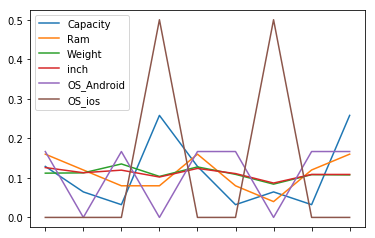

In [ ]:
df_l1.plot()
plt.show()

# minmax_scale

In [ ]:
minmax_scaled = minmax_scale(smartphones_data, feature_range=(-1, 1))
df_minmax = pd.DataFrame(minmax_scaled, index=smartphones.index,
                       columns = smartphones_data.columns)
df_minmax

,Capacity,Ram,Weight,inch,OS_Android,OS_ios
Galaxy S8,-0.142857,1.000000,0.088235,1.000000,1.0,-1.0
Lumia 950,-0.714286,0.333333,0.117647,0.333333,-1.0,-1.0
Xperia L1,-1.000000,-0.333333,1.000000,0.666667,1.0,-1.0
Iphone 7,1.000000,-0.333333,-0.235294,-0.222222,-1.0,1.0
U Ultra,-0.142857,1.000000,0.705882,0.888889,1.0,-1.0
Galaxy S5,-1.000000,-0.333333,-0.029412,0.222222,1.0,-1.0
Iphone 5s,-0.714286,-1.000000,-1.000000,-1.000000,-1.0,1.0
Moto G5,-1.000000,0.333333,-0.058824,0.111111,1.0,-1.0
Pixel,1.000000,1.000000,-0.088235,0.111111,1.0,-1.0


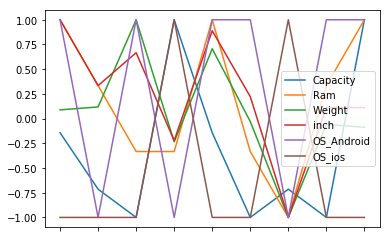

In [ ]:
df_minmax.plot()
plt.show()

# Outliers

In [ ]:

sr_temp = pd.Series([6, 6, 7, 5, 7, 3, 7, 10, 22, 8])
sr_temp

0     6
1     6
2     7
3     5
4     7
5     3
6     7
7    10
8    22
9     8
dtype: int64

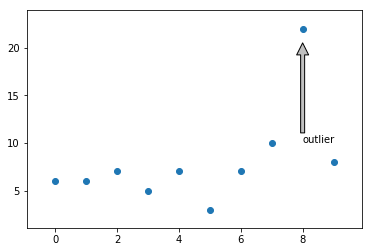

In [ ]:
plt.scatter(x = sr_temp.index, y = sr_temp.values)
plt.annotate(xy=(8, 20.5), xytext =(8,10), s='outlier', 
             arrowprops={'facecolor' : 'silver', 'width' : 4} )
plt.margins(0.1)
plt.show()

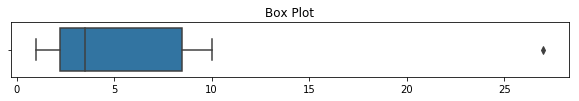

In [ ]:
import seaborn as sb

plt.figure(figsize=(10,1))
sr_temp = pd.Series([1, 2, 3, 4, 10, 27])
sb.boxplot(sr_temp.values)
plt.title('Box Plot')
plt.show()

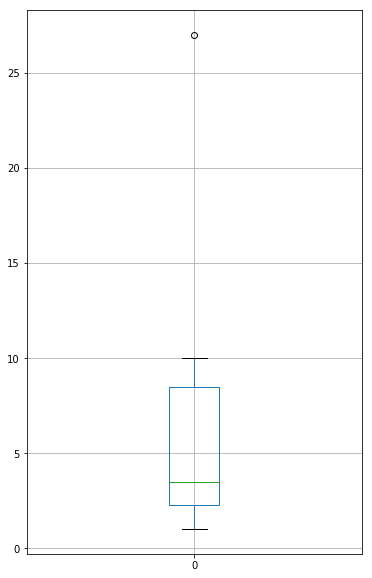

In [ ]:
plt.figure(figsize=(6, 10))
pd.DataFrame(sr_temp).boxplot()
plt.show()

In [ ]:
sr_temp.quantile([0.25, 0.5, 0.75]) 

0.25    2.25
0.50    3.50
0.75    8.50
dtype: float64

In [ ]:
d = sr_temp.describe()
d

count     6.000000
mean      7.833333
std       9.907909
min       1.000000
25%       2.250000
50%       3.500000
75%       8.500000
max      27.000000
dtype: float64

In [ ]:
IQR = d['75%'] - d['25%']
up_ex = d['75%'] + (1.5*IQR)
low_ex = d['25%'] - (1.5*IQR)

IQR, up_ex, low_ex

(6.25, 17.875, -7.125)

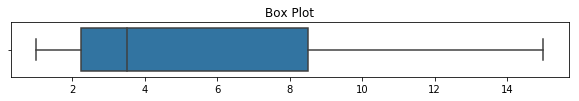

In [ ]:
plt.figure(figsize=(10,1))
sr_temp = pd.Series([1, 2, 3, 4, 10,15])
sb.boxplot(sr_temp.values)
plt.title('Box Plot')
plt.show()

In [ ]:
d = sr_temp.describe()
d

count     6.000000
mean      5.833333
std       5.492419
min       1.000000
25%       2.250000
50%       3.500000
75%       8.500000
max      15.000000
dtype: float64

In [ ]:
IQR = d['75%'] - d['25%']
up_ex = d['75%'] + (1.5*IQR)
low_ex = d['25%'] - (1.5*IQR)

IQR, up_ex, low_ex

(6.25, 17.875, -7.125)